On 12/16/2020, Kristina Nyland e-mailed Amy and me suggesting that it may make more sense to look at the FIRST/VLASS/6-GHz observations and use the data as "colors", rather than assuming a spectral index and interpreting them as light curves.

*Recall that colors in the optical are defined as 

$$ V - B = m_V - m_B = -2.5 \log_{10}(\frac{f_V}{f_B}) $$

We can then define a few colors to help interpret these results:

$$ C - L  = -2.5 \log_{10}(\frac{f_{6GHz}}{f_{1.4GHz}}) $$

$$ C - S = -2.5 \log_{10}(\frac{f_{6GHz}}{f_{3GHz}}) $$

$$ S - L = -2.5 \log_{10}(\frac{f_{3GHz}}{f_{1.4GHz}}) $$

Where L, S, C are the different radio bands.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richardsplot

/Users/trevormccaffrey/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
! ls

1-FIRST__J115549.44+502116.56_post?RA=11+55+49.44++50+21+16.56&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin__img-2.fits
1045+5202
1045+5202-mosaic.fits
1129+5120
1129+5120-mosaic.fits
1155+5021
1155+5021-mosaic.fits
1155+5021_cutoutResults.tgz
1159+5106
1159+5106-mosaic.fits
1429+4747
1429+4747-mosaic.fits
2-FIRST__J115901.65+510630.6_post?RA=11+59+01.656++51+06+30.6&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
2-VLASS__1.2.ql.T23t12.J115901.65+510630.6.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
3-FIRST__J142943.05+474726.52_post?RA=14+29+43.056++47+47+26.52&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
3-VLASS__1.2.ql.T22t15.J142943.05+474726.52.10.2048.v1.I.ite

In [3]:
#Load in data from variability table
df = pd.read_csv("../all_var_figs.csv")
df

,Name,z,S1p4_FIRST,S1p4_err,S6_FIRST,S6_FIRST_err,S6_FIRST_alpha0,S6_FIRST_alpha0_err,L6_FIRST,L6_FIRST_alpha0,...,S6_Aconfig,S6_Aconfig_err,L6_Aconfig,L6_Aconfig_alpha0,L6_Aconfig_uplim,L6_Aconfig_lolim,DATE_VLAA,CLASS,Alpha,VAR
0,083353.88+422401.8,0.249,229570,420,82889.378614,151.646727,229570.0,420.0,25.164438,25.539260,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
1,084347.84+203752.4,0.227,2870,140,1036.252632,50.548909,2870.0,140.0,23.172767,23.552993,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,1.0
2,085632.99+595746.8,0.283,24790,180,8950.767504,64.991454,24790.0,180.0,24.321270,24.687927,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
3,092837.98+602521.0,0.295,11500,1900,4152.231799,686.020906,11500.0,1900.0,24.027959,24.391786,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
4,093200.07+553347.4,0.266,4950,290,1787.264992,104.708454,4950.0,290.0,23.561717,23.932430,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,\nodata,RL,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,161711.42+063833.4,0.229,630,0,227.470090,0.000000,630.0,0.0,22.522610,22.902340,...,466.2,7.100000,22.834258,22.771572,0.006564,-0.006665,2019-08,RQ,-0.7,0.0
66,161723.67+085414.7,0.206,450,0,162.478636,0.000000,450.0,0.0,22.275612,22.661085,...,386.7,18.164801,22.652190,22.595246,0.019936,-0.020895,2019-08,RQ,0.0,0.0
67,161940.56+254323.0,0.269,1430,110,516.320998,39.717000,1430.0,110.0,23.033272,23.403265,...,407.0,21.633308,22.929946,22.857523,0.022492,-0.023720,2019-08,RQ,-0.7,0.0
68,162750.54+473623.5,0.262,1260,110,454.940180,39.717000,1260.0,110.0,22.952871,23.324546,...,441.0,12.000000,22.939355,22.868614,0.011660,-0.011981,2019-09,RQ,-0.7,0.0


In [4]:
! ls ../..

AWK_CONDON.txt
AmpSelfCal
BarvainisRQQs.csv
BootCamp
CASA_Images
CASA_Notebooks
CONDONTEST.csv
CONDON_POSITION_ERRORSp1.csv
CoAS_Poster.pdf
DR7
FITS_Images
FITS_VLBA
HerreraRuiz2016RQQs.csv
ICA_reconstructions.pdf
ImageTextFiles
Images_png
Kellerman2016
MIZ2.csv
Mosaics
OpticalProperties.csv
OpticalSpectra
PAPER_11_11_2020.pdf
Paper.rtf
PaperDraft_10-07-2020.pdf
PaperPlots
Paper_drafts
Papers_used.txt
Posters
PyBDSF_macdownload.txt
REU_Paper_McCaffrey.pdf
REU_Paper_draft1.pdf
REU_Paper_draft2.pdf
REU_Talk
REU_paper.ipynb
RQQfigs.csv
RadioProperties.csv
RichardsvsMcC_luminositydistribution.pdf
SB1_sources
SpringFinalFigs_moreParams.csv
UlvestadRQQs.csv
VLBA
Variability
Variability_spectra.ipynb
casa-20200817-020301.log
colorbar_settings.png
condon_sample_02z045_NVSS.txt
contour_images.ipynb
contour_props.txt
contour_props_kellermann.txt
distances.ipynb
first_vlass_cutouts
flux_distribution.ipynb
flux_ratio.ipynb
flux_ratio_wnondetections.ipynb
forced_photometry.csv
image_insets.ipynb
in

In [5]:
df2 = pd.read_csv("../../radeccoords_29RQQs_forvariability.csv")
df2.sort_values("Name", inplace=True)
df2

,Name,RA,DEC.,Speak,e_Speak,Speak2,e_sPeak2,eSpeak_fin,Epoch
3,0822+4553,08 22 05.24,+45 53 49.1,420,0,453.60,0.0,0.000000,2
0,0843+5357,08 43 13.41,+53 57 18.8,360,0,414.00,0.0,0.000000,1
17,0856+1057,08 56 40.78,+10 57 55.8,630,130,724.50,149.5,176.862941,1
11,0935+4819,09 35 09.48,+48 19 10.2,810,130,874.80,140.4,185.672857,2
18,1000+1047,10 00 33.88,+10 47 23.7,760,130,874.00,149.5,188.005984,1
19,1004+1510,10 04 38.82,+15 10 57.3,435,130,500.25,149.5,163.119013,1
12,1010+3003,10 10 00.68,+30 03 21.5,950,130,1026.00,140.4,200.046020,2
13,1013+2212,10 13 25.43,+22 12 29.4,630,130,680.40,140.4,169.240687,2
4,1045+2933,10 45 28.30,+29 33 44.7,360,0,388.80,0.0,0.000000,2
1,1045+5202,10 45 41.76,+52 02 35.5,435,0,500.25,0.0,0.000000,1


In [6]:
RQ = df[["CLASS"]].values.flatten() == "RQ"
RI = df[["CLASS"]].values.flatten() == "RI"
RL = df[["CLASS"]].values.flatten() == "RL"

In [7]:
fL = df[["S1p4_FIRST"]].values.flatten()
fS = df[["S3_VLASS"]].values.flatten()
fC = df[["S(6)_p"]].values.flatten()

In [8]:
fS

array([1.850e+05, 3.180e+03, 5.652e+04, 7.820e+03, 4.690e+03, 2.825e+04,
       2.157e+04, 1.398e+04, 1.449e+04, 3.648e+05, 5.720e+03, 2.631e+04,
       7.470e+03, 3.370e+04, 4.070e+03, 3.940e+03, 4.190e+03, 1.300e+03,
       3.810e+03, 3.300e+02, 9.640e+02, 1.070e+03, 1.030e+03, 9.070e+02,
       8.560e+02, 3.150e+03, 1.900e+03, 2.250e+03, 1.780e+03, 2.260e+03,
       9.990e+02, 1.890e+03, 1.710e+03, 1.870e+03, 1.910e+03, 1.310e+03,
       7.210e+02, 1.260e+03, 2.830e+03, 1.310e+03, 1.960e+03,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan])

In [9]:
fS[RQ] = df2[["Speak2"]].values.flatten()
fS

array([1.8500e+05, 3.1800e+03, 5.6520e+04, 7.8200e+03, 4.6900e+03,
       2.8250e+04, 2.1570e+04, 1.3980e+04, 1.4490e+04, 3.6480e+05,
       5.7200e+03, 2.6310e+04, 7.4700e+03, 3.3700e+04, 4.0700e+03,
       3.9400e+03, 4.1900e+03, 1.3000e+03, 3.8100e+03, 3.3000e+02,
       9.6400e+02, 1.0700e+03, 1.0300e+03, 9.0700e+02, 8.5600e+02,
       3.1500e+03, 1.9000e+03, 2.2500e+03, 1.7800e+03, 2.2600e+03,
       9.9900e+02, 1.8900e+03, 1.7100e+03, 1.8700e+03, 1.9100e+03,
       1.3100e+03, 7.2100e+02, 1.2600e+03, 2.8300e+03, 1.3100e+03,
       1.9600e+03, 4.5360e+02, 4.1400e+02, 7.2450e+02, 8.7480e+02,
       8.7400e+02, 5.0025e+02, 1.0260e+03, 6.8040e+02, 3.8880e+02,
       5.0025e+02, 3.8880e+02, 6.2100e+02, 1.0925e+03, 1.0580e+03,
       4.8600e+02, 4.5360e+02, 4.0500e+02, 4.5360e+02, 5.8650e+02,
       6.1525e+02, 4.6980e+02, 5.0600e+02, 4.3125e+02, 5.7500e+02,
       6.4800e+02, 6.2100e+02, 7.4750e+02, 1.0584e+03, 6.2100e+02])

In [10]:
#define colors
#12/18/20: still don't have S-band data for the RQQs
C_L = -2.5 * np.log10(fC/fL)
C_S = -2.5 * np.log10(fC/fS)
S_L = -2.5 * np.log10(fS/fL)

In [11]:
#Want to colorcode the points based on quiet/int/loud
colors = np.array(["red", "blue", "yellow"])
col = np.empty(len(df), dtype=str)

col[RQ] = colors[0] ; col[RI] = colors[1] ; col[RL] = colors[2]

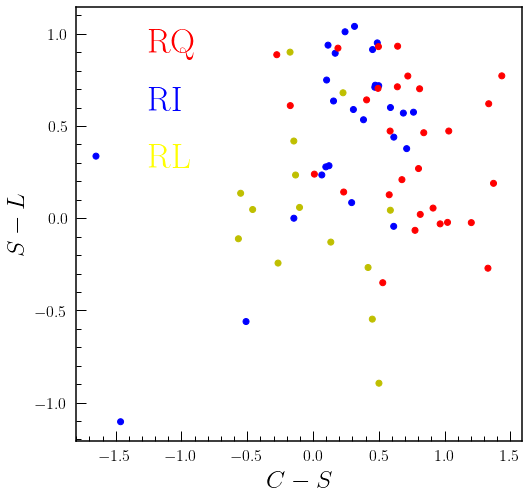

In [12]:
fig = plt.figure(figsize=(8,8))
plt.scatter(C_S, S_L, c=col)
fig.text(0.25, 0.8, "RQ", fontsize=35, color=colors[0])
fig.text(0.25, 0.7, "RI", fontsize=35, color=colors[1])
fig.text(0.25, 0.6, "RL", fontsize=35, color=colors[2])
plt.xlabel("$C-S$", fontsize=25)
plt.ylabel("$S-L$", fontsize=25)
#plt.legend(loc="best")
plt.show()

In [13]:
colors

array(['red', 'blue', 'yellow'], dtype='<U6')

Yellow points are RL;

Purplish points are RI

It *might* make more physical sense to just look at the L-to-S and L-to-C spectral indices

In [14]:
alpha_C_L = np.log10(fC/fL) / np.log10(6/1.4)
alpha_C_S = np.log10(fC/fS) / np.log10(6./3)
alpha_S_L = np.log10(fS/fL) / np.log10(3/1.4)

In [15]:
col

array(['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       'y', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r'], dtype='<U1')

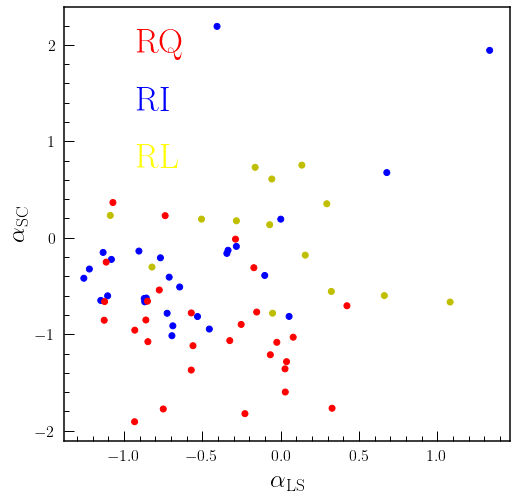

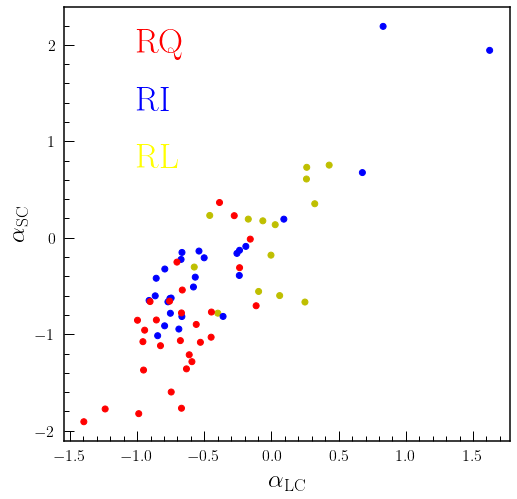

In [16]:
fig = plt.figure(figsize=(8,8))
plt.scatter(alpha_S_L, alpha_C_S, c=col)
fig.text(0.25, 0.8, "RQ", fontsize=35, color=colors[0])
fig.text(0.25, 0.7, "RI", fontsize=35, color=colors[1])
fig.text(0.25, 0.6, "RL", fontsize=35, color=colors[2])
plt.xlabel("$\\alpha_\mathrm{LS}$", fontsize=25)
plt.ylabel("$\\alpha_\mathrm{SC}$", fontsize=25)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.scatter(alpha_C_L, alpha_C_S, c=col)
fig.text(0.25, 0.8, "RQ", fontsize=35, color=colors[0])
fig.text(0.25, 0.7, "RI", fontsize=35, color=colors[1])
fig.text(0.25, 0.6, "RL", fontsize=35, color=colors[2])
plt.xlabel("$\\alpha_\mathrm{LC}$", fontsize=25)
plt.ylabel("$\\alpha_\mathrm{SC}$", fontsize=25)
plt.show()

----

Now load in the targets that include TGSS/LOFAR data.  Here's the source count breakdown for those targets:

10 matched to TGSS:
- 0 RQ
- 2 RI
- 8 RL, but one has total flux >1 Jy, so VLASS measurement should not be used as per VLASS memo 13

7 matched to LOTSS:
- 5 RQ, two being very solid >1500-mJy detections at 144 MHz
- 1 RI
- 1 RL

Of course, there are some new colors available for this data.  From a quick Google, it looks like 144 MHz frequency lies roughly in the VMF band(?), so I'll call it V-band here for short

$$ L - V  = -2.5 \log_{10}(\frac{f_{1.4GHz}}{f_{144MHz}}) $$

$$ S - V  = -2.5 \log_{10}(\frac{f_{3GHz}}{f_{144MHz}}) $$

$$ C - V  = -2.5 \log_{10}(\frac{f_{6GHz}}{f_{144MHz}}) $$

In [17]:
! ls

1-FIRST__J115549.44+502116.56_post?RA=11+55+49.44++50+21+16.56&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
1-VLASS__1.2.ql.T23t12.J115549.44+502116.56.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin__img-2.fits
1045+5202
1045+5202-mosaic.fits
1129+5120
1129+5120-mosaic.fits
1155+5021
1155+5021-mosaic.fits
1155+5021_cutoutResults.tgz
1159+5106
1159+5106-mosaic.fits
1429+4747
1429+4747-mosaic.fits
2-FIRST__J115901.65+510630.6_post?RA=11+59+01.656++51+06+30.6&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
2-VLASS__1.2.ql.T23t12.J115901.65+510630.6.10.2048.v1.I.iter1.image.pbcor.tt0.subim_s2.0arcmin_.fits
3-FIRST__J142943.05+474726.52_post?RA=14+29+43.056++47+47+26.52&Equinox=J2000&ImageSize=4.0&ImageType=FITS+Image&Download=1&FITS=1_s2.0arcmin_.fits
3-VLASS__1.2.ql.T22t15.J142943.05+474726.52.10.2048.v1.I.ite

In [18]:
radio_colors = pd.read_csv("radio_colors_data.csv")
radio_colors

,Name,angDist,_RAJ2000,_DEJ2000,Speak,e_Speak,S_FIRST,e_S_FIRST,S_VLASS,e_S_VLASS,S_Kell,e_S_Kell,CLASS
0,ILTJ145005.05+463521.9,1.088564,222.52100,46.58940,16100.0,100.0,4490,130,2019.60,461.224694,1192.0,41.0,RI
1,J083658.7+442601,1.889369,129.24474,44.43381,51600.0,7700.0,9150,120,4255.20,933.669863,2596.0,79.0,RI
2,J110717.4+080434,6.448674,166.82268,8.07612,24200.0,3700.0,2790,140,1155.60,275.193155,800.0,29.4,RI
3,ILTJ111121.72+482046.2,0.372505,167.84050,48.34620,3800.0,100.0,14550,280,15098.40,3256.306308,8132.0,245.2,RL
4,J083353.8+422402,0.856867,128.47424,42.40066,250600.0,25300.0,229570,420,199800.00,43038.237139,209000.0,6270.1,RL
5,J085633.0+595748,1.618473,134.13788,59.96342,238700.0,24000.0,24790,180,64998.00,14018.083322,35614.0,1068.6,RL
6,J092838.0+602522,2.057154,142.15875,60.42302,824000.0,82500.0,11500,1900,8993.00,2029.310268,8943.0,268.8,RL
7,J112952.9+221519,0.570142,172.47073,22.25543,166500.0,16900.0,33220,190,15649.20,3372.946449,17013.0,510.9,RL
8,J154743.6+205221,4.904186,236.93181,20.87260,5617600.0,561800.0,35200,190,38755.00,8519.196274,51414.0,1555.3,RL
9,J113109.6+311404,2.830690,172.79036,31.23454,1327000.3,132000.8,277000,1300,134989.20,11798.425418,176000.0,5286.4,RL


In [19]:
sV = radio_colors[["Speak"]].values.flatten() ; e_sV = radio_colors[["e_Speak"]].values.flatten()
sL = radio_colors[["S_FIRST"]].values.flatten() ; e_sL = radio_colors[["e_S_FIRST"]].values.flatten()
sS = radio_colors[["S_VLASS"]].values.flatten() ; e_sS = radio_colors[["e_S_VLASS"]].values.flatten()
sC = radio_colors[["S_Kell"]].values.flatten() ; e_sC = radio_colors[["e_S_Kell"]].values.flatten()

In [20]:
rq = radio_colors[["CLASS"]].values.flatten() == "RQ"
ri = radio_colors[["CLASS"]].values.flatten() == "RI"
rl = radio_colors[["CLASS"]].values.flatten() == "RL"

In [21]:
LVcol = np.log10(sL/sV) / np.log10(1.4/.144)
SVcol = np.log10(sS/sV) / np.log10(6/.144)
CVcol = np.log10(sC/sV) / np.log10(6/.144)
CLcol = np.log10(sC/sL) / np.log10(6/1.4)
CScol = np.log10(sC/sS) / np.log10(6/3.)
SLcol = np.log10(sS/sL) / np.log10(3/1.4)

In [22]:
colorcode = radio_colors[["CLASS"]].values.flatten().copy()
colorcode[rq] = 0. ; colorcode[ri] = 1. ; colorcode[rl] = 2. 

In [23]:
col_data = pd.DataFrame(np.array([LVcol, SVcol, CVcol, CLcol, CScol, SLcol, colorcode]).T, \
                      columns=["$L-V$", "$S-V$", "$C-V$", "$C-L$", "$C-S$", "$S-L$", "CLASS"], dtype=float)
col_data

,$L-V$,$S-V$,$C-V$,$C-L$,$C-S$,$S-L$,CLASS
0,-0.561449,-0.556591,-0.697961,-0.911312,-0.760685,-1.048302,1.0
1,-0.760533,-0.669056,-0.801552,-0.865659,-0.712937,-1.004556,1.0
2,-0.949832,-0.815543,-0.914147,-0.858377,-0.530570,-1.156509,1.0
3,0.590301,0.369892,0.203986,-0.399773,-0.892714,0.048545,2.0
4,-0.038537,-0.060740,-0.048670,-0.064505,0.064946,-0.182238,2.0
5,-0.995758,-0.348782,-0.510086,0.248953,-0.867951,1.264749,2.0
6,-1.878208,-1.211283,-1.212778,-0.172802,-0.008044,-0.322645,2.0
7,-0.708685,-0.633985,-0.611582,-0.459823,0.120549,-0.987656,2.0
8,-2.230295,-1.334262,-1.258479,0.260337,0.407779,0.126241,2.0
9,-0.688819,-0.612779,-0.541650,-0.311645,0.382731,-0.943164,2.0


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


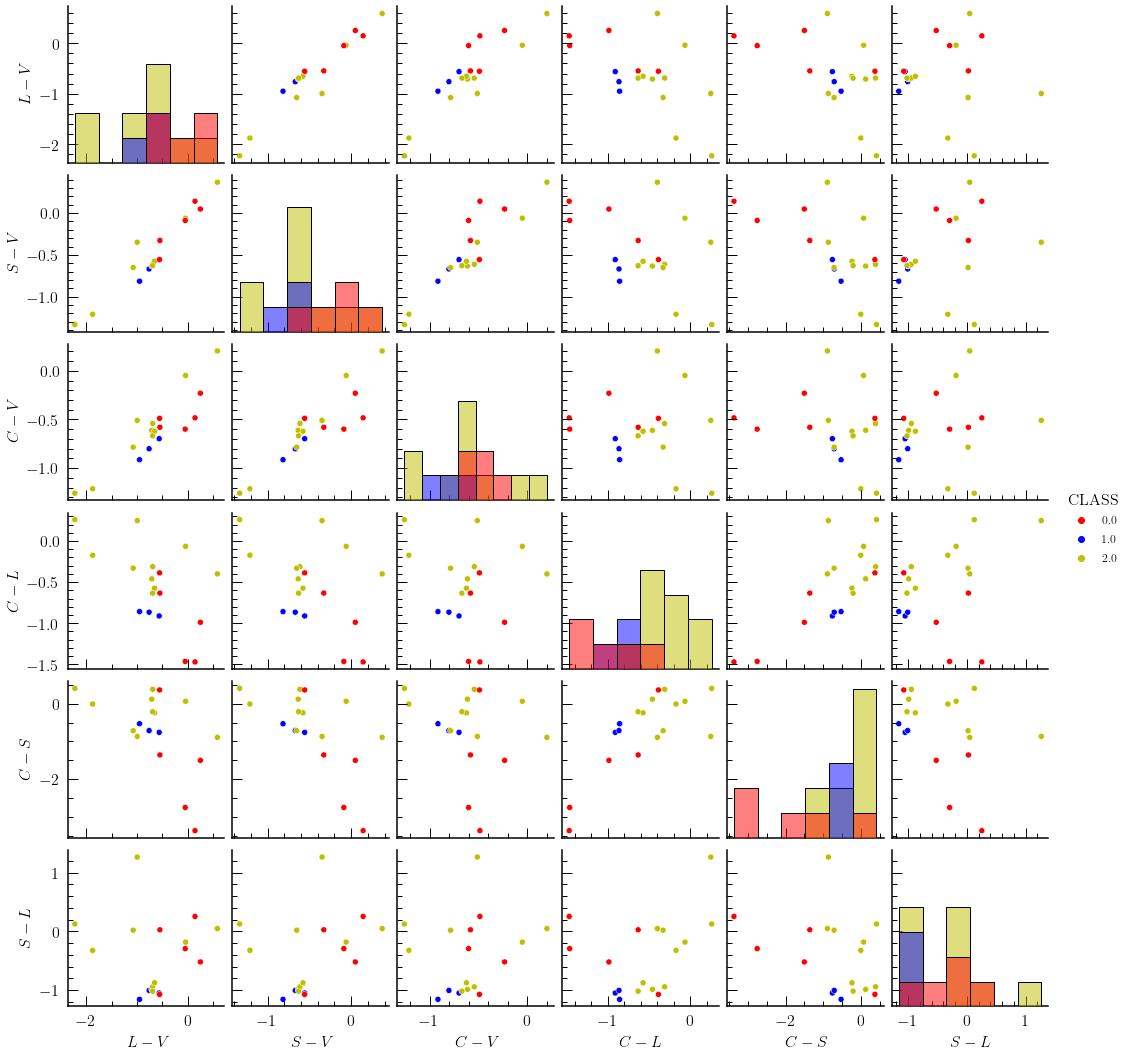

In [24]:
import seaborn as sns
sns.pairplot(col_data, vars=col_data.columns[:-1], diag_kind="hist", hue="CLASS", palette={0.0: "r", 1.0: "b", 2.0: "y"})

CLASS:  0.0 is RQ, 1.0 is RI, 2.0 is RL

---

In [25]:
nu  = np.array([0.144, 1.4, 3., 6.])
S   = np.array([sV, sL, sS, sC]).T
Serr= np.array([e_sV, e_sL, e_sS, e_sC]).T
S, Serr

(array([[1.61000000e+04, 4.49000000e+03, 2.01960000e+03, 1.19200000e+03],
        [5.16000000e+04, 9.15000000e+03, 4.25520000e+03, 2.59600000e+03],
        [2.42000000e+04, 2.79000000e+03, 1.15560000e+03, 8.00000000e+02],
        [3.80000000e+03, 1.45500000e+04, 1.50984000e+04, 8.13200000e+03],
        [2.50600000e+05, 2.29570000e+05, 1.99800000e+05, 2.09000000e+05],
        [2.38700000e+05, 2.47900000e+04, 6.49980000e+04, 3.56140000e+04],
        [8.24000000e+05, 1.15000000e+04, 8.99300000e+03, 8.94300000e+03],
        [1.66500000e+05, 3.32200000e+04, 1.56492000e+04, 1.70130000e+04],
        [5.61760000e+06, 3.52000000e+04, 3.87550000e+04, 5.14140000e+04],
        [1.32700030e+06, 2.77000000e+05, 1.34989200e+05, 1.76000000e+05],
        [2.35000200e+05, 5.32000000e+04, 2.73240000e+04, 2.31000000e+04],
        [1.30740005e+07, 1.13200000e+06, 1.15000000e+06, 7.00000000e+05],
        [1.59800020e+06, 3.32000000e+05, 1.52950000e+05, 1.32000000e+05],
        [1.70000000e+03, 4.90000000e+0

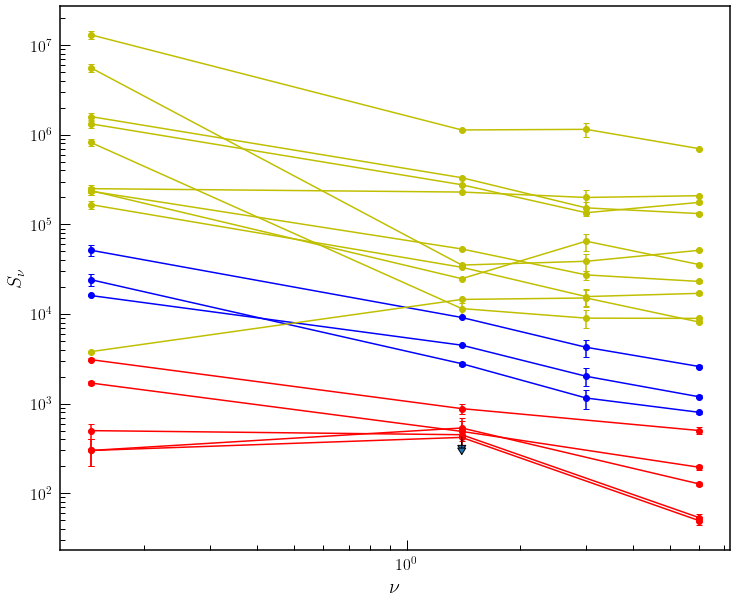

In [26]:
fig = plt.figure(figsize=(12,10))
for i in range(len(S)):

    if radio_colors[["CLASS"]].values.flatten()[i] == "RQ":
        plt.errorbar(x=[nu[0], nu[1], nu[3]], y=S[i,[True,True,False,True]], yerr=Serr[i,[True,True,False,True]], fmt="-o", capsize=2.8, color="r")
        
    elif radio_colors[["CLASS"]].values.flatten()[i] == "RI":
        plt.errorbar(x=nu, y=S[i,:], yerr=Serr[i,:], fmt="-o", capsize=2.8, color="b")

    elif radio_colors[["CLASS"]].values.flatten()[i] == "RL":
        plt.errorbar(x=nu, y=S[i,:], yerr=Serr[i,:], fmt="-o", capsize=2.8, color="y")

    if Serr[i,1]==0.0:
        plt.annotate('', xy=(nu[1], S[i,1]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
"""    
    if Serr[i,2]==0.0:
        plt.annotate('', xy=(nu[2], S[i,2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
"""
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_{\\nu}$", fontsize=20)
plt.xlabel("$\\nu$", fontsize=20)
plt.show()

All 5 RQQs considered here are non-detections in VLASS (so those points aren't plotted); two are non-detections in FIRST as well, indicated by the upper limit symbols above.